In [1]:
import random

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

C:\Users\abram\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import tweepy

In [3]:
import pandas as pd

In [4]:
import numpy as num

In [5]:

col_names=['date','user_loc','followers','friends','message','bbox_coords',\
           'full_name','country','country_code','place_type']


df_twtr = pd.read_csv('Trump_data2.csv', names=col_names)


df_twtr.head()

,date,user_loc,followers,friends,message,bbox_coords,full_name,country,country_code,place_type
0,2019-09-14 22:58:05,United Kingdom,121,194,"I’m a massive Trump supporter in the UK, also ...","[[[-0.820681, 51.361118], [-0.7702217, 51.3611...","Crowthorne, England",United Kingdom,GB,city
1,2019-09-14 22:57:46,TEXAS,289,530,@NRCC PRESIDENT DONAD J. TRUMP 👏👏👏🙏🇺🇸. Warren ...,"[[[-106.645646, 25.837092], [-93.508131, 25.83...","Texas, USA",United States,US,admin
2,2019-09-14 22:57:40,"Moon, PA",1209,2176,"Trump back at the golf ⛳ \r\ncourse, AGAIN‼️🤡🤡...","[[[-80.267456, 40.428384], [-80.169829, 40.428...","Imperial, PA",United States,US,city
3,2019-09-14 22:57:29,NaN,1258,2103,@wheresmygift Yikes yall got a whole ass Trump...,"[[[-87.733451, 42.0191507], [-87.6649403, 42.0...","Evanston, IL",United States,US,city
4,2019-09-14 22:57:28,"Murphy, NC 28906",116,188,@HannaAndSkeffy @kim @AngelaBelcamino @realDon...,"[[[-90.310298, 34.982924], [-81.646901, 34.982...","Tennessee, USA",United States,US,admin


In [6]:
df_twtr.to_pickle('df_paulry.p') 

In [7]:
df_paulry = pd.read_pickle('df_paulry.p') 

In [8]:
print (df_paulry)

                   date                      user_loc  followers  friends  \
0   2019-09-14 22:58:05                United Kingdom        121      194   
1   2019-09-14 22:57:46                        TEXAS         289      530   
2   2019-09-14 22:57:40                      Moon, PA       1209     2176   
3   2019-09-14 22:57:29                           NaN       1258     2103   
4   2019-09-14 22:57:28              Murphy, NC 28906        116      188   
5   2019-09-14 22:57:27                 United States       2816     5002   
6   2019-09-14 22:57:08             Pennsylvania, USA       1049     2104   
7   2019-09-14 22:56:48                           NaN       3760     4756   
8   2019-09-14 22:56:20                           NaN         11      159   
9   2019-09-14 22:56:16             Pennsylvania, USA       1049     2104   
10  2019-09-14 22:55:51                       florida       4764     4896   
11  2019-09-14 22:55:33                  Florida, USA       3591     4873   

In [9]:
import nltk

In [10]:
import re

In [11]:
import pickle

In [12]:
import pickle

In [14]:

def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [16]:
from string import punctuation

import json
from wordcloud import WordCloud

In [17]:

df_paulry['message'] = df_paulry['message'].apply(processTweet)

df_paulry['message'].head()

0    ’ massive trump supporter the also big passion...
1    president donad trump  warren are qualified sp...
2               trump back the golf ⛳ course again‼️⛳ 
3               yikes yall got whole ass trump too smh
4          really that all you can come with against… 
Name: message, dtype: object

In [18]:
all_words = []
for line in list(df_paulry['message']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [20]:
pd.set_option('display.max_colwidth', -1)
plt.style.use('seaborn-white')

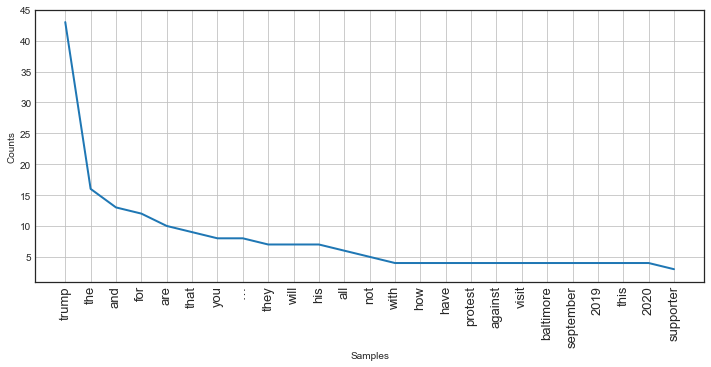

Text(0.5, 0, 'Word Rank')

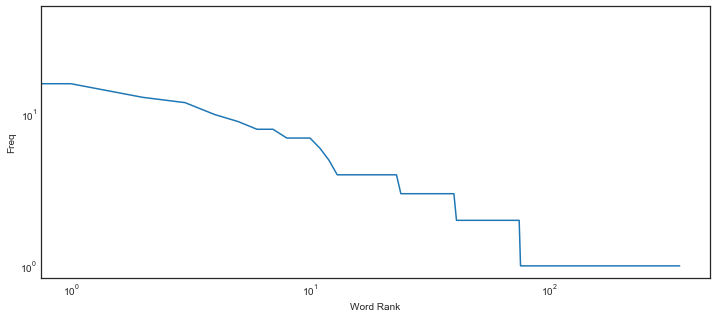

In [21]:

plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log  
word_counts = sorted(Counter(all_words).values(), reverse=True)

plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

In [22]:

df_paulry = df_paulry.drop_duplicates('message')
df_paulry.shape

(52, 10)

In [23]:
import stop-words

SyntaxError: invalid syntax (<ipython-input-23-cf352d2b3aa4>, line 1)

In [24]:
import string

In [25]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() ]


def remove_words(word_list):
    remove = ['paul','ryan','...','“','”','’','…','ryan’']
    return [w for w in word_list if w not in remove]


In [43]:
#tokeninazcja
df_paulry = df_paulry.copy()
df_paulry['tokens'] = df_paulry['message'].apply(text_process) 
df_paulry['no_pauls'] = df_paulry['tokens'].apply(remove_words) 
df_paulry.head()

,date,user_loc,followers,friends,message,bbox_coords,full_name,country,country_code,place_type,tokens,no_pauls
0,2019-09-14 22:58:05,United Kingdom,121,194,’ massive trump supporter the also big passion are the wolves needs protect them they are vital eco friendly said,"[[[-0.820681, 51.361118], [-0.7702217, 51.361118], [-0.7702217, 51.386957], [-0.820681, 51.386957]]]","Crowthorne, England",United Kingdom,GB,city,"[’, massive, trump, supporter, the, also, big, passion, are, the, wolves, needs, protect, them, they, are, vital, eco, friendly, said]","[massive, trump, supporter, the, also, big, passion, are, the, wolves, needs, protect, them, they, are, vital, eco, friendly, said]"
1,2019-09-14 22:57:46,TEXAS,289,530,president donad trump warren are qualified speaks with forked tongue lies upon lies,"[[[-106.645646, 25.837092], [-93.508131, 25.837092], [-93.508131, 36.500695], [-106.645646, 36.500695]]]","Texas, USA",United States,US,admin,"[president, donad, trump, warren, are, qualified, speaks, with, forked, tongue, lies, upon, lies]","[president, donad, trump, warren, are, qualified, speaks, with, forked, tongue, lies, upon, lies]"
2,2019-09-14 22:57:40,"Moon, PA",1209,2176,trump back the golf ⛳ course again‼️⛳,"[[[-80.267456, 40.428384], [-80.169829, 40.428384], [-80.169829, 40.47999], [-80.267456, 40.47999]]]","Imperial, PA",United States,US,city,"[trump, back, the, golf, ⛳, course, again‼️⛳]","[trump, back, the, golf, ⛳, course, again‼️⛳]"
3,2019-09-14 22:57:29,NaN,1258,2103,yikes yall got whole ass trump too smh,"[[[-87.733451, 42.0191507], [-87.6649403, 42.0191507], [-87.6649403, 42.071723], [-87.733451, 42.071723]]]","Evanston, IL",United States,US,city,"[yikes, yall, got, whole, ass, trump, too, smh]","[yikes, yall, got, whole, ass, trump, too, smh]"
4,2019-09-14 22:57:28,"Murphy, NC 28906",116,188,really that all you can come with against…,"[[[-90.310298, 34.982924], [-81.646901, 34.982924], [-81.646901, 36.678119], [-90.310298, 36.678119]]]","Tennessee, USA",United States,US,admin,"[really, that, all, you, can, come, with, against…]","[really, that, all, you, can, come, with, against…]"


In [27]:

df_paulry['tokens'].head(10) 

0    [’, massive, trump, supporter, the, also, big, passion, are, the, wolves, needs, protect, them, they, are, vital, eco, friendly, said]    
1    [president, donad, trump, warren, are, qualified, speaks, with, forked, tongue, lies, upon, lies]                                         
2    [trump, back, the, golf, ⛳, course, again‼️⛳]                                                                                             
3    [yikes, yall, got, whole, ass, trump, too, smh]                                                                                           
4    [really, that, all, you, can, come, with, against…]                                                                                       
5    [hour, spinal, surgery, days, ago, hospital, for, more, day, was, hoping, trump, would, wake, dead, from, old, age, but, hes, not, dammit]
6    [ill, place, bets, trump]                                                                                                          

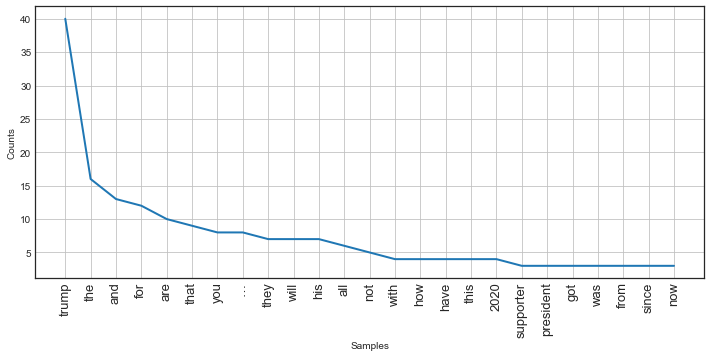

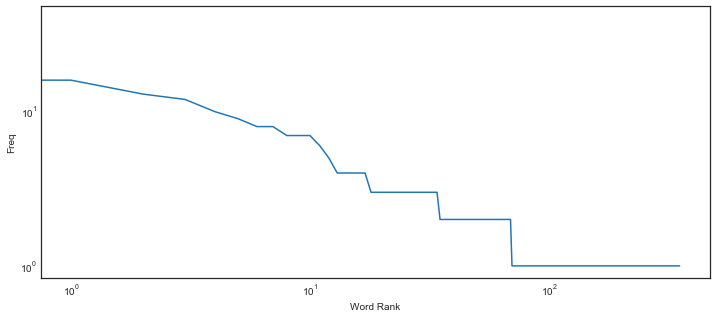

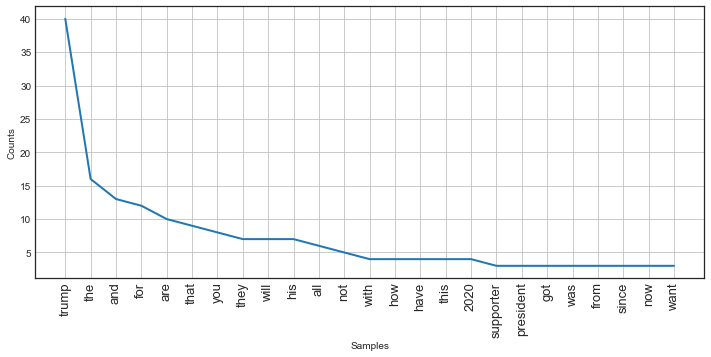

Text(0.5, 0, 'Word Rank')

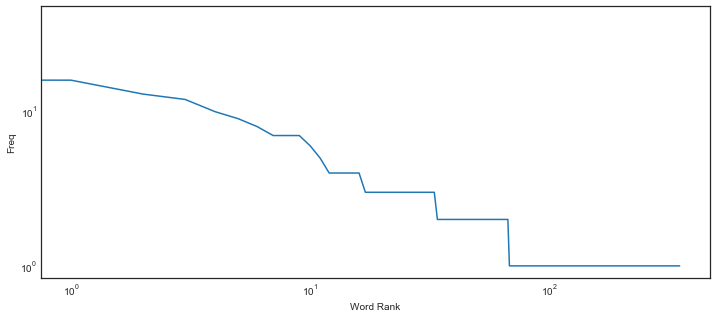

In [28]:

all_words = []
for ls in df_paulry['tokens']:
    words = [w for w in ls]
    for word in words:
        all_words.append(word.lower())
    
# plot word frequency d
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# log-log
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")


no_pauls = []
for ls in df_paulry['no_pauls']:
    words = [w for w in ls]
    for word in words:
        no_pauls.append(word)
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(no_pauls)
fd.plot(25,cumulative=False)

# log-log  of all words -- no_pauls 
word_counts = sorted(Counter(no_pauls).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

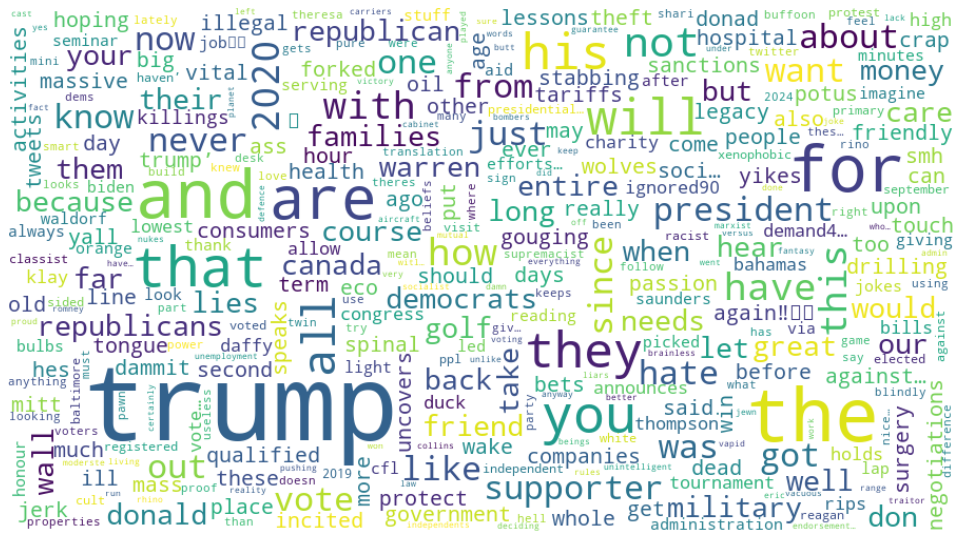

In [45]:

all_words = []
for line in df_paulry['no_pauls']: # try 'tokens'
    all_words.extend(line)
    

wordfreq = Counter(all_words)


wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                    background_color="white",
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# vetorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(df_paulry['message'])

print(len(bow_transformer.vocabulary_))

353


In [31]:

messages_bow = bow_transformer.transform(df_paulry['message'])


print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (52, 353)
Amount of Non-Zero occurences:  549


In [32]:
sample_tweet = df_paulry['message']
print(sample_tweet)
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')

0     ’ massive trump supporter the also big passion are the wolves needs protect them they are vital eco friendly said  
1     president donad trump  warren are qualified speaks with forked tongue lies upon lies                               
2     trump back the golf ⛳ course again‼️⛳                                                                              
3     yikes yall got whole ass trump too smh                                                                             
4     really that all you can come with against…                                                                         
5     hour spinal surgery days ago hospital for more day was hoping trump would wake dead from old age but hes not dammit
6     ill place bets trump                                                                                               
7     potus may well put sanctions back oil companies drilling since they are now gouging consumers and stabbing …       
8     not want hear how 

In [33]:
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 352)	0.030258925825695816
  (0, 351)	0.15694589559052052
  (0, 350)	0.0547808755156462
  (0, 349)	0.0547808755156462
  (0, 348)	0.16361200274740137
  (0, 347)	0.030258925825695816
  (0, 346)	0.030258925825695816
  (0, 345)	0.030258925825695816
  (0, 344)	0.030258925825695816
  (0, 343)	0.0547808755156462
  (0, 342)	0.030258925825695816
  (0, 341)	0.030258925825695816
  (0, 340)	0.030258925825695816
  (0, 339)	0.030258925825695816
  (0, 338)	0.030258925825695816
  (0, 337)	0.09510628073572765
  (0, 336)	0.030258925825695816
  (0, 335)	0.1431605024039762
  (0, 334)	0.030258925825695816
  (0, 333)	0.030258925825695816
  (0, 332)	0.030258925825695816
  (0, 331)	0.030258925825695816
  (0, 330)	0.0547808755156462
  (0, 329)	0.030258925825695816
  (0, 328)	0.030258925825695816
  :	:
  (0, 24)	0.19618236948815065
  (0, 23)	0.030258925825695816
  (0, 22)	0.030258925825695816
  (0, 21)	0.030258925825695816
  (0, 20)	0.030258925825695816
  (0, 19)	0.22857915958218192
  (0, 18)	0.03025892582

In [34]:
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)

  (0, 352)	0.030258925825695816
  (0, 351)	0.15694589559052052
  (0, 350)	0.0547808755156462
  (0, 349)	0.0547808755156462
  (0, 348)	0.16361200274740137
  (0, 347)	0.030258925825695816
  (0, 346)	0.030258925825695816
  (0, 345)	0.030258925825695816
  (0, 344)	0.030258925825695816
  (0, 343)	0.0547808755156462
  (0, 342)	0.030258925825695816
  (0, 341)	0.030258925825695816
  (0, 340)	0.030258925825695816
  (0, 339)	0.030258925825695816
  (0, 338)	0.030258925825695816
  (0, 337)	0.09510628073572765
  (0, 336)	0.030258925825695816
  (0, 335)	0.1431605024039762
  (0, 334)	0.030258925825695816
  (0, 333)	0.030258925825695816
  (0, 332)	0.030258925825695816
  (0, 331)	0.030258925825695816
  (0, 330)	0.0547808755156462
  (0, 329)	0.030258925825695816
  (0, 328)	0.030258925825695816
  :	:
  (0, 24)	0.19618236948815065
  (0, 23)	0.030258925825695816
  (0, 22)	0.030258925825695816
  (0, 21)	0.030258925825695816
  (0, 20)	0.030258925825695816
  (0, 19)	0.22857915958218192
  (0, 18)	0.03025892582

In [52]:
# some IDF (inverse document frequency) example
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['lies']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['that']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['trump']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['love']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['supporter']])

4.277144732992177
2.890850371872286
1.256719846847814
4.277144732992177
3.583997552432231


In [36]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(52, 353)


In [38]:
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("twitter_sentiment.pkl" )



In [40]:
# run predictions on twitter data
tweet_preds = model_NB.predict(df_twtr['message'])

# append predictions to dataframe
df_tweet_preds = df_twtr.copy()
df_tweet_preds['predictions'] = tweet_preds
df_tweet_preds.shape

(55, 11)

In [41]:
# print text and sentiment

index = random.sample(range(tweet_preds.shape[0]), 20)
for text, sentiment in zip(df_tweet_preds.message[index],
                           df_tweet_preds.predictions[index]):
    print (sentiment, '--', text, '\n')

1 -- @joncoopertweets @realDonaldTrump Trump’s legacy  
1-Hate tweets incited mass killings
3-ignored90%of US demand4… https://t.co/lv6PGmJdeX 

1 -- Mutual defence? 😂😂😂😂😂😂
Did the US run out of nukes, aircraft carriers, and long range bombers???
Donald Jewn Trump https://t.co/8vFVyF2laH 

0 -- @Pam93592944 President Trump 2020. Looking for his twin for 2024. 

0 -- @LauraJaneGrace @MetroChicago @RiotFest Eric Trump 

1 -- Protest against Trump visit to Baltimore, September 2019 #BaltimoreWelcomingCommittee #fucktrump https://t.co/jBSa6mcewR 

0 -- That's ok don't want Romney to anyway he's a damn Rhino and with everything he's done that will be his endorsement… https://t.co/vvR4NalV1Z 

0 -- @KamalaHarris I love Trump. 2020 

1 -- Protest against Trump visit to Baltimore, September 2019 #BaltimoreWelcomingCommittee #fucktrump https://t.co/GoGHQU7RxB 

1 -- @thomaskaine5 what do military families feel about trump using their money to build a useless wall? 

0 -- Anyone that is a Trump 

In [53]:
pos = df_tweet_preds.predictions.value_counts()[0]
neg = df_tweet_preds.predictions.value_counts()[1]

print('Model predictions: Positives - {}, Negatives - {}'.format(neg,pos))

Model predictions: Positives - 24, Negatives - 31


In [54]:
# save dataframe with appended preditions 
df_tweet_preds.to_pickle('paulry_predicts_df.p')

In [61]:
# load dataframe with predictions
df = pd.read_pickle('paulry_predicts_df.p')
df.tail()

,date,user_loc,followers,friends,message,bbox_coords,full_name,country,country_code,place_type,predictions
50,2019-09-14 22:48:14,Dublin,1230,2640,"@mikedbrook Very Trump, for sure.","[[[-6.387438, 53.2987449], [-6.1078047, 53.2987449], [-6.1078047, 53.4110598], [-6.387438, 53.4110598]]]","Dublin City, Ireland",Ireland,IE,city,0
51,2019-09-14 22:48:07,"Texas, U.S.A.",65,43,"@realDonaldTrump I'm voting for Trump, and I would be proud to be his friend and he, my friend.","[[[-106.645646, 25.837092], [-93.508131, 25.837092], [-93.508131, 36.500695], [-106.645646, 36.500695]]]","Texas, USA",United States,US,admin,0
52,2019-09-14 22:47:50,Canada,1537,1542,@liberal_party fantasy versus #soyboyjustin @JustinTrudeau reality. \r\n#ChooseForward\r\n#TrudeauMustGo… https://t.co/zAoJogIVQp,"[[[-111.698457, 48.99839], [-110.004669, 48.99839], [-110.004669, 50.833346], [-111.698457, 50.833346]]]","Cypress County, Alberta",Canada,CA,city,0
53,2019-09-14 22:47:44,"Memphis, TN",352,233,@andy_arcamax Is this a joke? Trump of course,"[[[-90.310298, 34.982924], [-81.646901, 34.982924], [-81.646901, 36.678119], [-90.310298, 36.678119]]]","Tennessee, USA",United States,US,admin,0
54,2019-09-14 22:47:29,NaN,2353,4416,"Mutual defence? 😂😂😂😂😂😂\r\nDid the US run out of nukes, aircraft carriers, and long range bombers???\r\nDonald Jewn Trump https://t.co/8vFVyF2laH","[[[144.593741856, -38.433859306], [145.512528832, -38.433859306], [145.512528832, -37.5112737225], [144.593741856, -37.5112737225]]]","Melbourne, Victoria",Australia,AU,city,1


In [56]:

df.country.unique()

array(['United Kingdom', 'United States', 'Brazil', 'Ireland', 'Canada',
       'Australia'], dtype=object)

In [58]:

df.country.value_counts(1).head(10)

United States     0.872727
United Kingdom    0.036364
Ireland           0.036364
Brazil            0.018182
Canada            0.018182
Australia         0.018182
Name: country, dtype: float64

In [60]:
insert traceback

SyntaxError: invalid syntax (<ipython-input-60-f90a3c0634b4>, line 1)

In [72]:

def lats(x):
    return x[1]

def longs(x):
    return x[0]

# --------------------------------------------------------#


In [73]:
# append longs and lats to dframe
df['latitude'] = df['bbox_coords'].apply(lats)
df['longitude'] = df['bbox_coords'].apply(longs)
df.columns

Index(['date', 'user_loc', 'followers', 'friends', 'message', 'bbox_coords',
       'full_name', 'country', 'country_code', 'place_type', 'predictions',
       'latitude', 'longitude'],
      dtype='object')

In [67]:

from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime


In [70]:
import pandas as pd
import numpy as np
import csv
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random


import pickle
import re
from collections import Counter
from string import punctuation
import tweepy
from tweepy import OAuthHandler
import json
from wordcloud import WordCloud


In [74]:
# for US tweets extract state abreviations for a new STATE column
# helper function to extract state origin of every tweet
def get_state(x):
    
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
              "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
              "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
              "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
              "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

    states_dict = {
            'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa',
            'AZ': 'Arizona','CA': 'California','CO': 'Colorado','CT': 'Connecticut',
            'DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
            'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois',
            'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
            'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan',
            'MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands',
            'MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina',
            'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey',
            'NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma',
            'OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
            'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas',
            'UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
            'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
    }


    abv = x.split(',')[-1].lstrip().upper()
    state_name = x.split(',')[0].lstrip()
    if abv in states:
        state = abv
    else:
        if state_name in states_dict.values():
            state = list(states_dict.keys())[list(states_dict.values()).index(state_name)]
        else:
            state = 'Non_USA'    
    return state

# ____________________________________________________________________________



In [75]:

df = df.copy()
df['states'] = df['full_name'].apply(get_state)


In [76]:

df.to_pickle('df_paulry_longs_lats.p')

In [77]:

df = pd.read_pickle('df_paulry_longs_lats.p')

Text(0, 0.5, 'Liczba wiadomości')

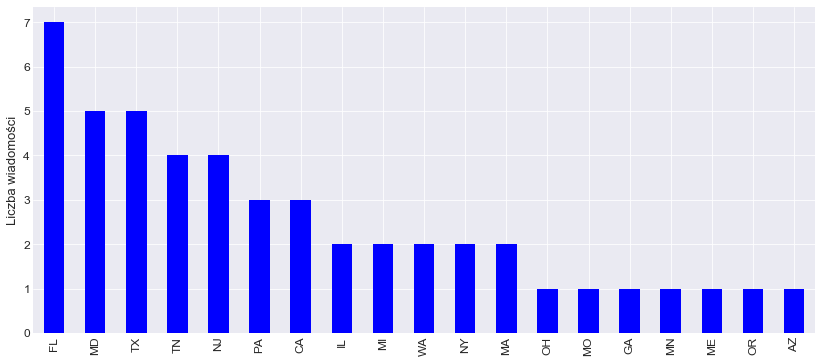

In [103]:

plt.style.use('seaborn-darkgrid')
df_states = df[df.country=='United States']
df_states = df_states[df_states.states!='Non_USA']

x = df_states.states.value_counts()
x.plot(kind='bar',figsize=(14,6),fontsize=12,color='blue')
plt.ylabel('Liczba wiadomości', fontsize=13)

In [79]:

df_state_sentiment = df_states.groupby(['states'])['predictions'].value_counts().unstack().fillna(0.0).reset_index()
df_state_sentiment['total_sentiment'] = -(df_state_sentiment[0])+df_state_sentiment[1] 
df_state_sentiment[15:24]

predictions,states,0,1,total_sentiment
15,PA,1.0,2.0,1.0
16,TN,3.0,1.0,-2.0
17,TX,3.0,2.0,-1.0
18,WA,1.0,1.0,0.0


In [101]:
# Create the sentiment by state Heat Map 

colorscale=[
            [0, 'rgb(31,120,180)'], 
            [0.35, 'rgb(166, 206, 227)'], 
            [0.75, 'rgb(251,154,153)'], 
            [1, 'rgb(227,26,28)']
           ]

data = dict(type='choropleth',
            colorscale = colorscale,
            reversescale=True,
            locations = df_state_sentiment['states'],
            z = df_state_sentiment['total_sentiment'],
            locationmode = 'USA-states',
            text = df_state_sentiment['states'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Twitter Sentiment"}
            )

layout = dict(title = 'Twitter Sentiment: GOP House Speaker: Paul Ryan',
              geo = dict(scope='usa'
                        )
             )
choromap_us = go.Figure(data = [data],layout = layout)

plotly.offline.plot(choromap_us, filename='img_map.html') 



'img_map.html'

In [84]:
import plotly.graph_objs as go

In [100]:
import plotly
import chart_studio

import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [90]:

geoplots = []
for index, row in df_states[['latitude','longitude','predictions']].iterrows():
    geoplots.append([row['latitude'],row['longitude'],row['predictions']])

mus = folium.Map(location=[39, -99], zoom_start=4)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(mus)

mus.choropleth(
    geo_data='us_states.geojson',
    fill_color='red', 
    fill_opacity=0.1, 
    line_opacity=0.2,
    name='US States')
    
mus.add_child(plugins.HeatMap(geoplots,
                            name='Twitter HeatMap',
                            radius=10,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))
folium.TileLayer('cartodbpositron').add_to(mus)
folium.TileLayer('cartodbdark_matter').add_to(mus)
folium.TileLayer('Mapbox Control Room').add_to(mus)
folium.LayerControl().add_to(mus)
mus.save("twitter_us_map.html") 
IFrame('twitter_us_map.html', width=960, height=520)

C:\Users\abram\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



FileNotFoundError: [Errno 2] No such file or directory: 'us_states.geojson'